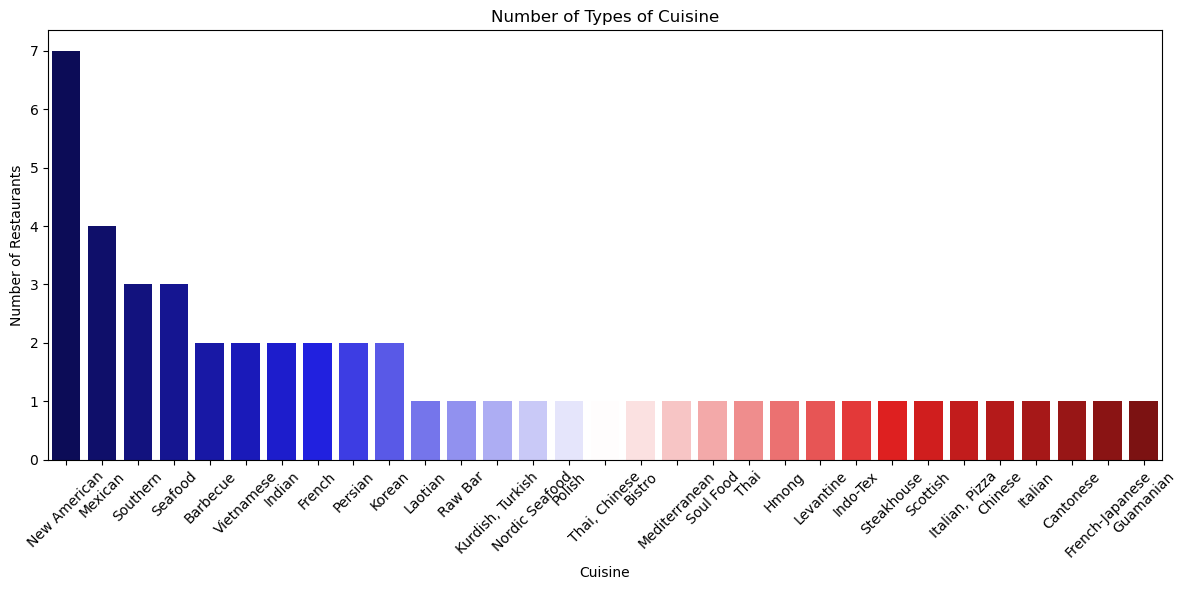

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("nytimes_best_restaurants_2024.csv", encoding="ISO-8859-1")

# Drop rows where all elements are NaN (fully empty rows)
df_cleaned = df.dropna(how='all')

# Optionally drop rows where any element is NaN (choose one method)
df_cleaned = df_cleaned.dropna(how='any')  # Overwrites the earlier clean

# Save the cleaned DataFrame to a new CSV
df_cleaned.to_csv('cleaned_restaurants.csv', index=False)

# Save the cuisine counts as a DataFrame and then to a CSV
cuisine_type = df_cleaned['cuisine_type'].value_counts()
cuisine_type.to_csv('cuisine_type_counts.csv', header=['Count'], index_label='Cuisine')

# Convert the Series into a DataFrame for plotting
cuisine_counts_df = cuisine_type.reset_index()
cuisine_counts_df.columns = ['Cuisine', 'Count']

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Cuisine', y='Count', data=cuisine_counts_df, palette='seismic', hue='Cuisine', dodge=False, legend=False)

# Set the title and labels
plt.title('Number of Types of Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()